# 2. Data visualization

In [1]:
# โค้ดใช้ plot graph
import seaborn as sns
import warnings
# โค้ดจัดการตาราง
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set maximum row to unlimit
#pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None) #show entire dataframe

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 2.1 นำเข้าข้อมูลที่ผ่านการจัดระเบียบมาแล้ว

In [4]:
file_id ='1pJHInigtVtRZkzKBCs33VJNwvPRwDn5w'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data.csv')
dat = pd.read_csv('data.csv')
dat.head()

,Product_id,Product_detail,Amount,Price,Discount,Discount_member,Sale_price,Branch,Date,Invoice_id,Member_id,Gender,category
0,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
1,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
2,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
3,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink
4,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01 00:00:00,900701056314,1000029,Female,Beverages & Drink


In [5]:
# แสดงหัวข้อทั้งหมดของฐานข้อมูล
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_id       3293 non-null   int64  
 1   Product_detail   3293 non-null   object 
 2   Amount           3293 non-null   int64  
 3   Price            3293 non-null   float64
 4   Discount         3293 non-null   float64
 5   Discount_member  3293 non-null   float64
 6   Sale_price       3293 non-null   float64
 7   Branch           3293 non-null   object 
 8   Date             3293 non-null   object 
 9   Invoice_id       3293 non-null   int64  
 10  Member_id        3293 non-null   int64  
 11  Gender           3293 non-null   object 
 12  category         3293 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 334.6+ KB


In [6]:
dat.describe()

,Product_id,Amount,Price,Discount,Discount_member,Sale_price,Invoice_id,Member_id
count,3.293000e+03,3293.000000,3293.000000,3293.0,3293.0,3293.000000,3.293000e+03,3.293000e+03
mean,2.265650e+11,1.873368,488.935469,0.0,0.0,488.935469,6.771308e+11,6.210367e+07
std,3.754413e+11,6.960141,2718.810116,0.0,0.0,2718.810116,2.773701e+11,2.254299e+08
min,5.001000e+03,-60.000000,-43200.000000,0.0,0.0,-43200.000000,1.001014e+11,1.000029e+06
25%,1.112360e+11,1.000000,50.000000,0.0,0.0,50.000000,6.004012e+11,2.000173e+06
50%,2.087231e+11,1.000000,138.000000,0.0,0.0,138.000000,7.003012e+11,2.000276e+06
75%,2.206410e+11,1.000000,360.000000,0.0,0.0,360.000000,9.007011e+11,2.000993e+06
max,8.850017e+12,150.000000,57300.000000,0.0,0.0,57300.000000,9.012011e+11,9.522944e+08


จากข้อมูลเบื้องต้น พบว่าคอลัมน์ของ ราคาส่วนลดมีค่าเฉลี่ยเป็น 0 หมายถึงในสามเดือนร้านค้าทั้งสองสาขาไม่มีโปรโมชันส่วนลดทั้งของลูกค้าทั่วไปและลูกค้าสมาชิก

## 2.2 เช็คข้อมูลยอดขายของแต่ละสาขา

In [7]:
print(dat.Member_id.unique())
len(dat.Member_id.unique())

[  1000029   2000173   2000404   2000986   2000993   2001135   2213348
   3004515  38841706  38846327   1000043   2000202   2000276   2213209
   3011556   3011705  38841531  38846682 952294374]


19

In [8]:
print("Branch A has ",len(dat.Member_id[dat.Branch == 'A'].unique()), " members")
print("Branch B has ",len(dat.Member_id[dat.Branch == 'B'].unique()), " members")

Branch A has  10  members
Branch B has  9  members


มีจำนวนสมาชิกทั้งหมด 19 คน จากสาขา A จำนวน 10 คน และ สาขา B จำนวน 9 คน



#### 2.2.1 เช็คยอดซื้อของสมาชิกแต่ละคน

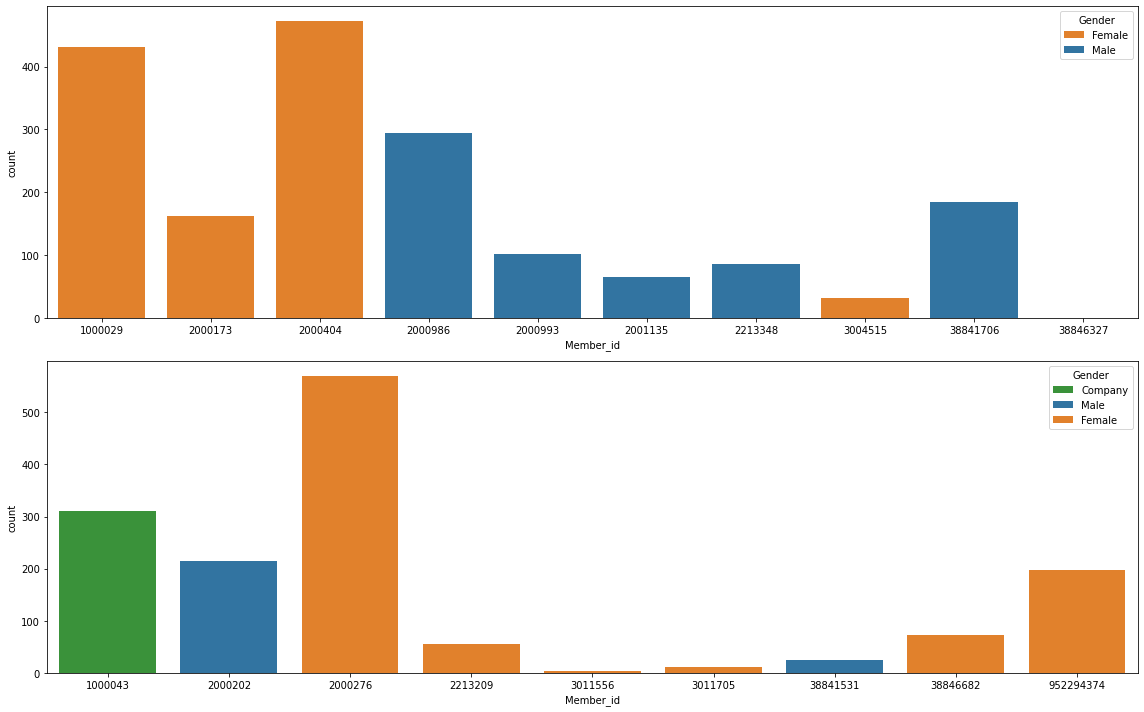

In [9]:
palette_set ={"Male": "C0", "Female": "C1", "Company": "C2"}

fig,ax = plt.subplots(2,1,figsize=(16,10))
sns.countplot('Member_id',data=dat.loc[dat.Branch =='A'],ax=ax[0],hue = 'Gender', dodge=False, palette= palette_set)
sns.countplot('Member_id',data=dat.loc[dat.Branch =='B'],ax=ax[1],hue = 'Gender', dodge=False, palette = palette_set)
plt.tight_layout()

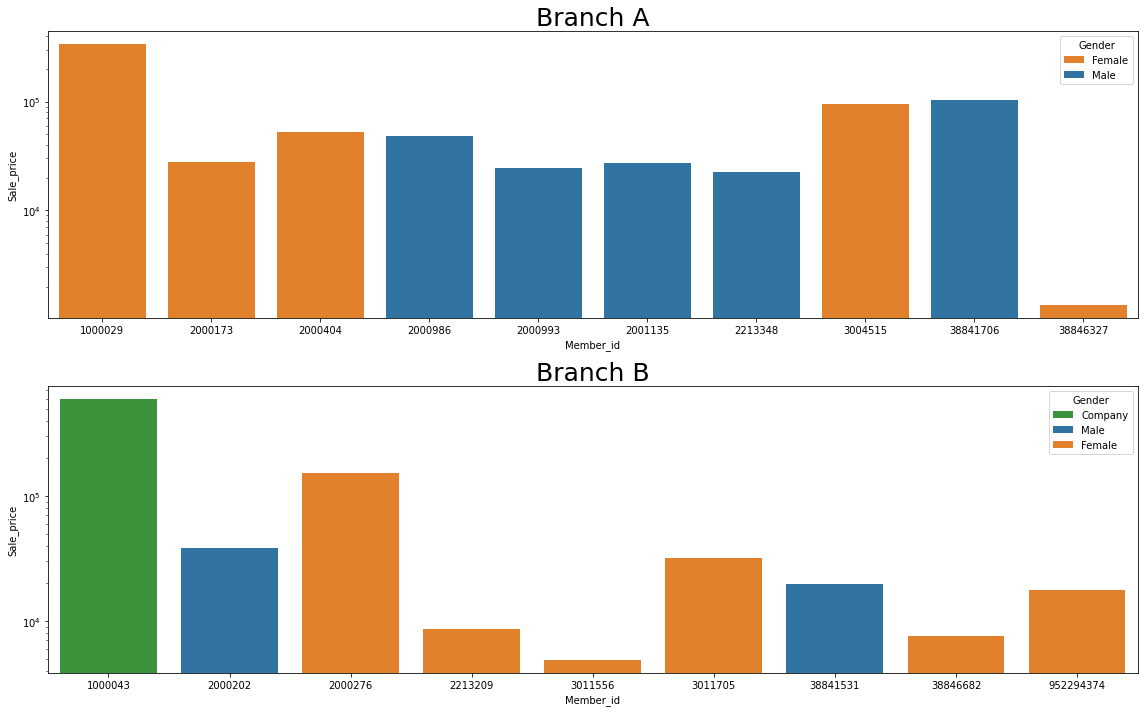

In [10]:
palette_set ={"Male": "C0", "Female": "C1", "Company": "C2"}

fig,ax = plt.subplots(2,1,figsize=(16,10))
sns.barplot(x = 'Member_id', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='A'],ax=ax[0],
            hue = 'Gender',dodge=False, palette= palette_set, ci=None)
sns.barplot(x = 'Member_id', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='B'],ax=ax[1],
            hue = 'Gender', dodge=False, palette = palette_set, ci=None)
ax[0].set(yscale="log")
ax[1].set(yscale="log")
ax[0].set_title('Branch A',fontsize=25)
ax[1].set_title('Branch B',fontsize=25)
plt.tight_layout()

สาขา A สมาชิก 1000029 มียอดซื้อสูงสุด 
สาขา B สมาขิก 1000043 มียอดซื้อสูงสุด​โดย สมาชิกB ลงทะเบียนเป็นบริษัท

#### 2.2.2เช็คยอดขายสินค้าแต่ละประเภท

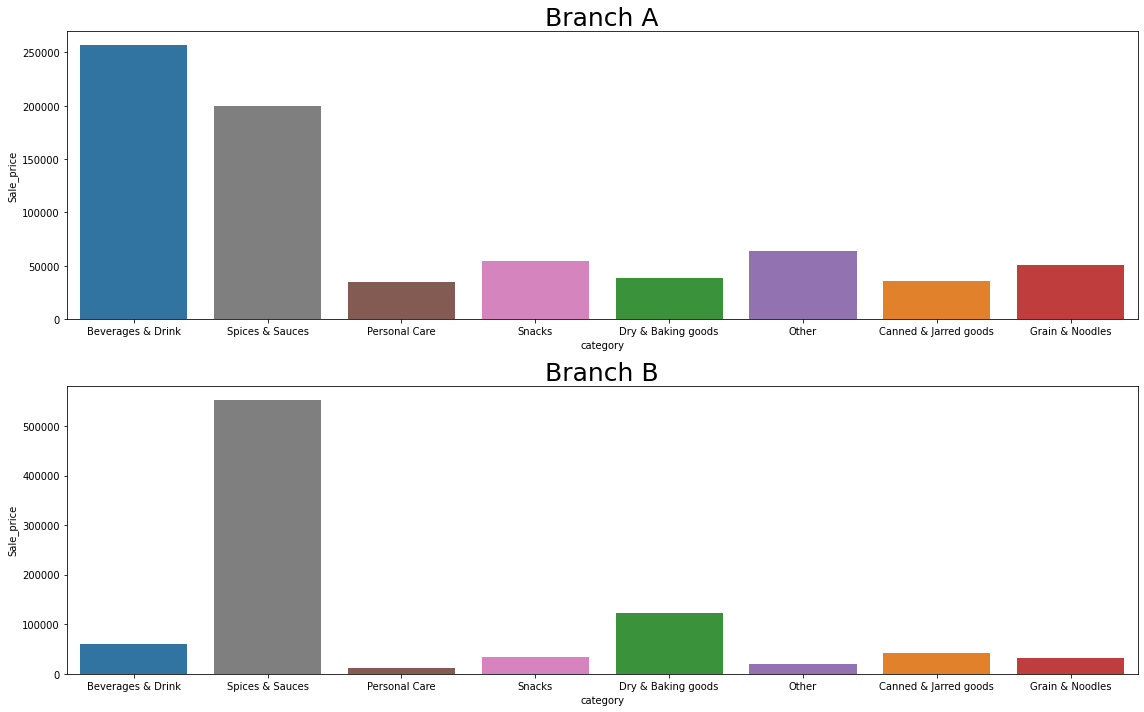

In [11]:
palette_set ={"Beverages & Drink": "C0",
              "Canned & Jarred goods":"C1",
              "Dry & Baking goods":"C2",
              "Grain & Noodles":"C3",
              "Other":"C4",
              "Personal Care": "C5",
              "Snacks":"C6",
              "Spices & Sauces": "C7"}

order = ["Beverages & Drink", "Spices & Sauces",   "Personal Care",
         "Snacks","Dry & Baking goods", "Other","Canned & Jarred goods","Grain & Noodles"]
fig,ax = plt.subplots(2,1,figsize=(16,10))
sns.barplot(x = 'category', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='A'],
            palette = palette_set, order = order, ax=ax[0], ci=None)
sns.barplot(x = 'category', y = 'Sale_price', estimator= sum, data=dat.loc[dat.Branch =='B'],
            palette = palette_set, order = order, ax=ax[1], ci=None)

ax[0].set_title('Branch A',fontsize=25)
ax[1].set_title('Branch B',fontsize=25)
plt.tight_layout()

Branch A มียอดขายสินค้าประเภท Beverages & Drink สูงที่สุด รองลงมาคือ Spices & sauces 
Branch B มียอดขาย Spices & Sauces สูงที่สุด 
ตารางด้านล่างแสดงจำนวนและยอดขายของสินค้าแต่ละประเภทในสาขา A และ B

In [12]:
datA = dat.loc[dat.Branch =='A'] #สาขา A
datB = dat.loc[dat.Branch =='B'] # สาขา B



In [13]:
A_cat = datA[['Sale_price','category']].groupby('category').sum()
B_cat = datB[['Sale_price','category']].groupby('category').sum()

cat_df = pd.concat([A_cat, B_cat], axis = 1)
cat_df.columns = ['Sale_A','Sale_B']
cat_df

,Sale_A,Sale_B
category,,
Beverages & Drink,256849.00,59950.0
Canned & Jarred goods,35805.00,41522.0
Dry & Baking goods,38542.00,123221.0
Grain & Noodles,50888.25,31474.0
Other,63780.25,20186.0
Personal Care,34747.00,11586.0
Snacks,54238.00,34298.0
Spices & Sauces,199963.00,553015.0


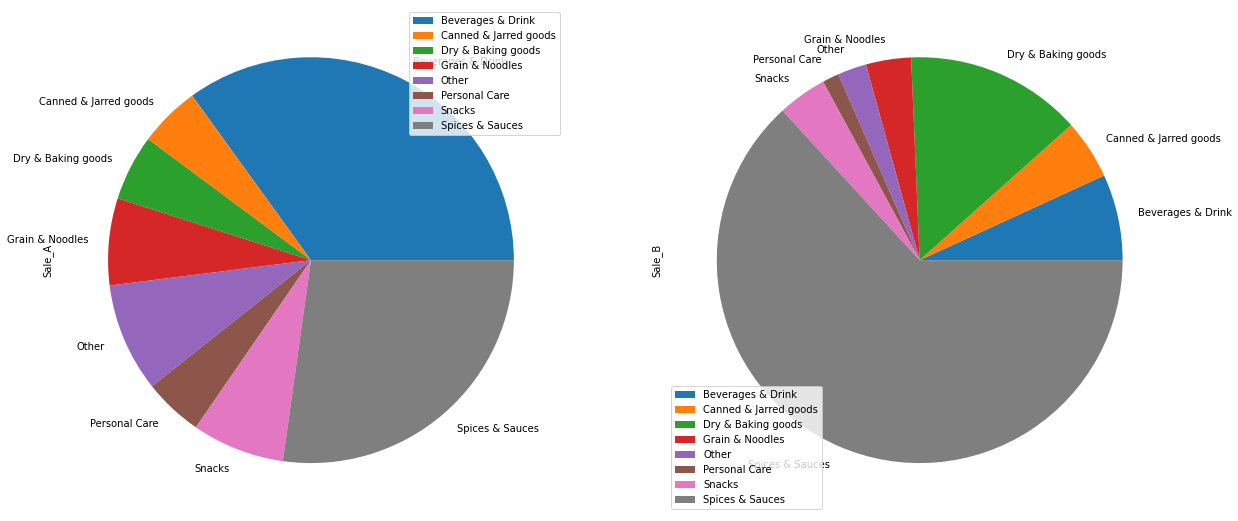

In [14]:
cat_df.plot.pie(subplots=True, figsize=(20, 10))
pass

#### 2.2.3 เปรียบเทียบจำนวนการซื้อของสมาชิกว่ามีสินค้าประเภทไหนบ้าง

In [15]:
A_member = []
for member in datA.Member_id.unique():
  dat_mem = datA.loc[datA.Member_id == member][['Sale_price','category']].groupby('category').sum()
  A_member.append(dat_mem)
A_member = pd.concat(A_member, axis = 1)
A_member.columns = datA.Member_id.unique()

In [16]:
# ตารางยอดซื้อของสมาชิกแต่ละ member_id ในสาขา A 
A_member

,1000029,2000173,2000404,2000986,2000993,2001135,2213348,3004515,38841706,38846327
Beverages & Drink,73407.0,16639.0,19766.00,16897.0,4537.0,1647.0,9733.0,72560.0,40313.0,1350.0
Canned & Jarred goods,22460.0,190.0,1595.00,2795.0,1510.0,NaN,1150.0,3745.0,2360.0,NaN
Dry & Baking goods,22050.0,227.0,333.00,368.0,645.0,13056.0,405.0,NaN,1458.0,NaN
Grain & Noodles,26209.0,1212.0,6671.25,3107.0,805.0,NaN,816.0,2520.0,9548.0,NaN
Other,44309.0,4741.0,3774.75,3232.0,3818.0,1563.0,1409.0,85.0,848.5,NaN
Personal Care,8078.0,866.0,4793.00,5555.0,2871.0,2088.0,3208.0,3600.0,3688.0,NaN
Snacks,24491.0,3537.0,11236.00,8283.0,96.0,46.0,1259.0,3700.0,1590.0,NaN
Spices & Sauces,113077.0,663.0,4178.00,7673.0,10464.0,8650.0,4663.0,7860.0,42735.0,NaN


In [17]:
B_member = []
for member in datB.Member_id.unique():
  dat_mem = datB.loc[datB.Member_id == member][['Sale_price','category']].groupby('category').sum()
  B_member.append(dat_mem)
B_member = pd.concat(B_member, axis = 1)
B_member.columns = datB.Member_id.unique()

In [18]:
# ตารางยอดซื้อของสมาชิกแต่ละ member_id ในสาขา A 
B_member

,1000043,2000202,2000276,2213209,3011556,3011705,38841531,38846682,952294374
Beverages & Drink,7930.0,14195.0,1856.0,6556.0,4350.0,16320.0,1027.0,2631.0,5085.0
Canned & Jarred goods,17789.0,1424.0,20692.0,780.0,NaN,NaN,NaN,NaN,837.0
Dry & Baking goods,102532.0,75.0,17583.0,NaN,NaN,2606.0,NaN,NaN,425.0
Grain & Noodles,19134.0,8011.0,2423.0,209.0,NaN,NaN,NaN,NaN,1697.0
Other,4922.0,2120.0,8894.0,470.0,NaN,NaN,387.0,505.0,2888.0
Personal Care,659.0,3328.0,3490.0,379.0,NaN,NaN,729.0,1582.0,1419.0
Snacks,23678.0,5041.0,112.0,200.0,NaN,NaN,NaN,1815.0,3452.0
Spices & Sauces,418720.0,3909.0,96222.0,65.0,535.0,12875.0,17655.0,1064.0,1970.0


## 2.3 วิเคราะห์ข้อมูลยอดขายวันและเดือน


### 2.3.1 เปรียบเทียบยอดขายสองสาขาในวันจันทร์ถึงอาทิตย์และเดือนสิงหาคมถึงตุลาคม




สร้างตารางที่แสดงวันซื้อ ว่าเป็นวันอะไรของสัปดาห์ วันที่เท่าไร และเดือนอะไร

In [19]:
dat['Date'] = pd.to_datetime(dat['Date'])
dat['weekday'] = (dat['Date']).dt.weekday
dat['day'] = (dat['Date']).dt.day
dat['month'] = (dat['Date']).dt.month
dat['year'] = (dat['Date']).dt.year
dat.head()

,Product_id,Product_detail,Amount,Price,Discount,Discount_member,Sale_price,Branch,Date,Invoice_id,Member_id,Gender,category,weekday,day,month,year
0,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,5,1,8,2020
1,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,5,1,8,2020
2,212547041005,AA เพียวริคุ ชาขาวมิกซ์เบอร์รี่ 350มล.,1,215.0,0.0,0.0,215.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,5,1,8,2020
3,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,5,1,8,2020
4,205022031002,AA โออิชิ น้ำผึ้งผสมมะนาว180มล.,1,235.0,0.0,0.0,235.0,A,2020-08-01,900701056314,1000029,Female,Beverages & Drink,5,1,8,2020


In [20]:
week_df = dat.groupby('Branch')['weekday'].value_counts().unstack()
week_df.columns = ['Mon', 'Tue','Wed','Thur','Fri','Sat','Sun']
week_df

,Mon,Tue,Wed,Thur,Fri,Sat,Sun
Branch,,,,,,,
A,285,279,317,187,223,179,361
B,205,134,181,283,105,336,218


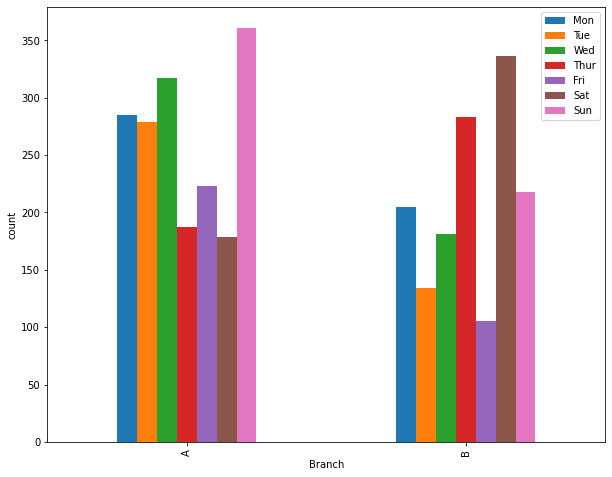

In [21]:
week_df.plot(kind='bar', figsize=(10, 8))
plt.ylabel('count')
plt.show()

สาขา A มียอดขายวันอาทิตย์สูงที่สุด ส่วน สาขา B มียอดขายวันเสาร์มากที่สุด

In [22]:
month_df = dat.groupby('Branch')['month'].value_counts().unstack()
month_df.columns = ['August', 'September','October']
month_df

,August,September,October
Branch,,,
A,896,508,427
B,745,365,352


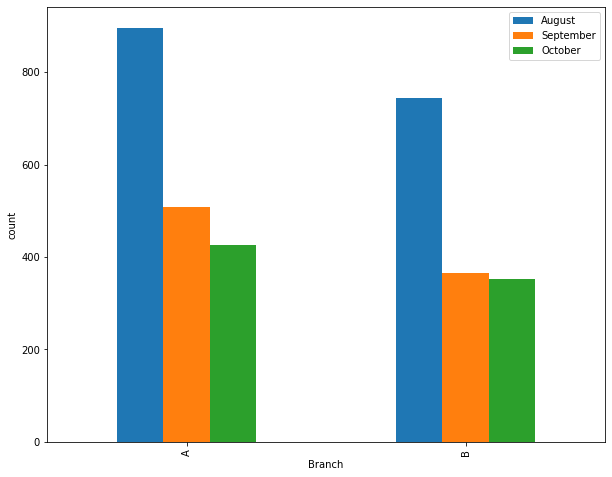

In [23]:
month_df.plot(kind='bar', figsize=(10, 8))
plt.ylabel('count')
plt.show()

เดือนสิงหาคมมียอดขายสูงสุดในสามเดือนทั้งสองสาขา และการซื้อขายมีแนวโน้มลดลงจากเดือนสิงหาคนถึงเดือนตุลาคม

## 2.4 วิเคราะห์ range ราคา ของสินค้าประเภทต่างๆ

---



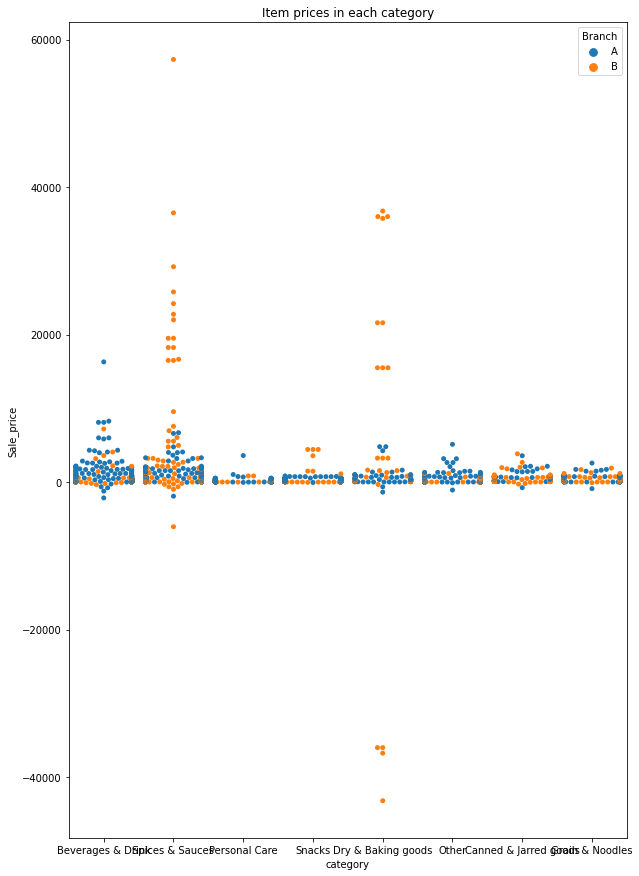

In [36]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.swarmplot(x="category",  y = "Sale_price",  hue = "Branch", data =dat)
ax.set_title("Item prices in each category")
pass

In [40]:
dat[dat.Sale_price < 0]

,Product_id,Product_detail,Amount,Price,Discount,Discount_member,Sale_price,Branch,Date,Invoice_id,Member_id,Gender,category,weekday,day,month,year
167,40102400002,ตั้งฉ่าย(ถุงใหญ่)500ก.ตรากระต่าย,-2,-1080.0,0.0,0.0,-1080.0,A,2020-08-19,901101026785,1000029,Female,Other,2,19,8,2020
191,207956011002,AA แบรนด์ ซุปไก่เขียวเล็ก1.5ออนซ์,-1,-2145.0,0.0,0.0,-2145.0,A,2020-08-23,900701060202,1000029,Female,Beverages & Drink,6,23,8,2020
286,133394011013,ปะทัดตาแป๊ะ,-1,-90.0,0.0,0.0,-90.0,A,2020-08-30,900701061386,1000029,Female,Other,6,30,8,2020
288,250981031003,อิชิตัน รสข้าวญี่ปุ่น 420มล.,-4,-1220.0,0.0,0.0,-1220.0,A,2020-08-30,900701061386,1000029,Female,Beverages & Drink,6,30,8,2020
370,216012011076,AA มาม่า ต้มยำน้ำข้น แพ็ค6,-1,-885.0,0.0,0.0,-885.0,A,2020-09-17,900701065110,1000029,Female,Grain & Noodles,3,17,9,2020
386,224547011002,AA กระทิงแดง ทีโอเปล็กซ์-แอล 100 มล.,-2,-770.0,0.0,0.0,-770.0,A,2020-09-25,600101203634,1000029,Female,Beverages & Drink,4,25,9,2020
387,223027161008,AA อร่อยดี กะทิอบควันเทียน250มล.,-1,-755.0,0.0,0.0,-755.0,A,2020-09-25,600101203634,1000029,Female,Canned & Jarred goods,4,25,9,2020
573,125014021078,AA ไลปอนเอฟ น้ำยาล้างจาน 150มล.,-1,-38.0,0.0,0.0,-38.0,A,2020-10-03,100101374286,2000173,Female,Personal Care,5,3,10,2020
813,202255011001,AA ไวตามิลค์ รสออริจินัล 250มล.,-1,-258.0,0.0,0.0,-258.0,A,2020-09-01,901101026934,2000404,Female,Beverages & Drink,1,1,9,2020
1327,208623011175,AA ฮานามิ รสดั้งเดิม 15กรัม,-1,-48.0,0.0,0.0,-48.0,A,2020-10-28,900701074564,2000986,Male,Snacks,2,28,10,2020


จากกราฟดูการกระจายตัวของราคาในรายการซื้อสินค้าประเภทต่างๆพบ สินค้าที่มีราคาติดลบ ซึ่งมาจากการคืนสินค้า จึงต้องกลับไป Clean data ใหม่ เพื่อตัดเอาข้อมูลสินค้าที่ซื้อแล้วคืนออกไป